# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [370]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [371]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display graphs directly within the notebook, just below the code cell
%matplotlib inline

### Understanding the structure of the data

In [372]:
# uncomment and run the following lines for Google Colab

from google.colab import drive

# Mount Google Drive to access files stored in it.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [373]:
data_orginal = pd.read_csv('/content/drive/My Drive/Colab Notebooks/foodhub_order.csv')   # Read our data file from the drive

In [374]:
data = data_orginal.copy() # to avoid changes on the original data

In [375]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [376]:
# Write your code here
data.shape # to know the shape of the data, the number of rows and columns

(1898, 9)

#### Observations:
* The dataset has 1,898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [377]:
# Write your code here
data.info() # to see datatypes and number of non-nulls of the different columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



* All the columns have 1,898 observations with no missing values but specifically we can not be sure about rating until we checked it in the right data type
* The rating column is being read as a 'object' data type but it should be in float format
*The  4 columns are of object type while the rest of the 5 columns are numerical in nature









In [378]:
data['rating'].value_counts() # number of values in rating column

,count
rating,
Not given,736
5,588
4,386
3,188


* We can observe that there are 4 unique ratings present in the dataset
* From the overview of the dataset, There are 736 observations where rating variable has missing values.

In [379]:
data['rating'] = data['rating'].replace(['Not given'], np.nan) # replacing 'Not given' values into nan

In [380]:
data['rating'] = data['rating'].astype(float) # change from obj to float datatype

In [381]:
print(data)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         Weekend     NaN   
1          Japanese        

* We have sucessfully changed 'Not given' to NaN

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
* We have changed rating data type from object to float (by first changing 'Not given' obj to Nan num value ) and noticed 736 missing values


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [383]:
# number of missing values in each columns or variables
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


736 values of ratings are missing

In [384]:
data['rating'].value_counts(normalize = True, dropna = False) # normalize is to see in percentage. dropna is to see nan values too


,proportion
rating,
NaN,0.387777
5.0,0.309800
4.0,0.203372
3.0,0.099052


38% of ratings values are missing

In [385]:
data.loc[data['rating'].isnull() == True]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


In [386]:
# Write your code here

# 736 missing data on rating
data['rating'] =  data['rating'].fillna(value = data['rating'].mean()) # replacing null rating values into the avg of the rows value

hence we can impute the missing values in the rating column by taking the mean rating

In [387]:
data['rating'] = data['rating'].round(1) # rounding of long float number into one decimal point

* Changing long float values to one decimal point

In [388]:
data.head(5) # to see the first five rows of the data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.3,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.3,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [389]:
data['rating'].value_counts() # to see number of counts for each values in rating column

,count
rating,
4.3,736
5.0,588
4.0,386
3.0,188


#### Observations:
All the missing values have been imputed and there are no missing values in our dataset now.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [390]:
# Write your code here
data['food_preparation_time'].describe() # to see statistical summary of 'food_preparation_time' variable

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
* There is no a huge difference between the 3rd quartile and the maximum value for the food preparation time indicating that there is no outliers in these variable




### **Question 5:** How many orders are not rated? [1 mark]

In [391]:
# Write the code here

NoRatn = data.loc[data['rating'] == 4.3] # we have replaced 4.3 mean value for all missing or non rated orders
print(NoRatn)

      order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
14     1478198        62667      Lucky's Famous Burgers     American   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     American   
1892   1477473        97838                 Han Dynasty      Chinese   
1895   1477819        35309           Blue Ribbon Sushi     Japanese   
1897   1478056       120353           Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0                 30.75         Weekend     4.3              

<Axes: xlabel='rating', ylabel='count'>

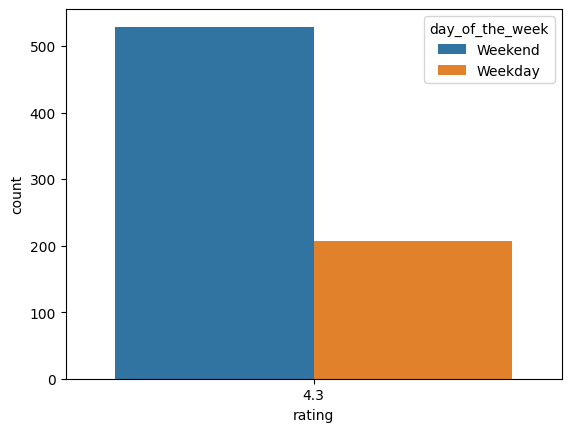

In [392]:
sns.countplot(data = NoRatn, x = 'rating', hue = 'day_of_the_week') # we used no rating data to their distributions over the week

<Axes: xlabel='rating', ylabel='count'>

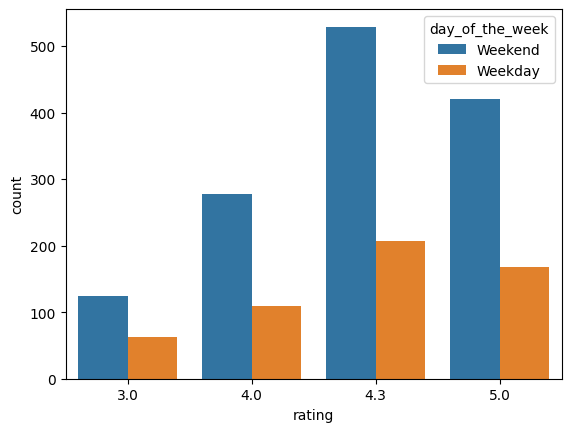

In [393]:
sns.countplot(data = data, x = 'rating', hue = 'day_of_the_week') # we used no rating data to their distributions over the week


#### Observations:
736  orders are not rated, Most ratings are not given on weekends, most probably peoples are busy with recration than giving rate for their order. Eventhough most orders are made in weekends

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

* First, let's explore each variables value to see how they are going to fit our graphs or charts

In [394]:
data['cuisine_type'].value_counts()


,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [395]:
len(data['cuisine_type'].value_counts())

14

* We have 14 unique cuisine_type's

In [396]:
data['cost_of_the_order'].value_counts()


,count
cost_of_the_order,
12.18,86
12.13,82
12.23,47
24.20,42
29.10,37
...,...
5.48,1
17.07,1
6.26,1


* And bunch of cost of orders like 312 prices

In [397]:
datah = data['restaurant_name'].value_counts()
print(datah)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


In [398]:
df = datah.to_frame(name='Order_Count') # change pd series into dataframe

df.rename(columns={'index': 'restaurant_name'}, inplace=True) # to also change the main data too
print(df)
#top_10 = pd.DataFrame({'restaurant_name': restaurant_name, 'orders': count })

                           Order_Count
restaurant_name                       
Shake Shack                        219
The Meatball Shop                  132
Blue Ribbon Sushi                  119
Blue Ribbon Fried Chicken           96
Parm                                68
...                                ...
Sushi Choshi                         1
Dos Caminos Soho                     1
La Follia                            1
Philippe Chow                        1
'wichcraft                           1

[178 rows x 1 columns]


In [399]:
top_10 = df.nlargest(10, 'Order_Count')
print(top_10)

                               Order_Count
restaurant_name                           
Shake Shack                            219
The Meatball Shop                      132
Blue Ribbon Sushi                      119
Blue Ribbon Fried Chicken               96
Parm                                    68
RedFarm Broadway                        59
RedFarm Hudson                          55
TAO                                     49
Han Dynasty                             46
Blue Ribbon Sushi Bar & Grill           44


* The aboves are top 10 popular resturants which recived more orders

In [400]:
bottom_10 = df.nsmallest(10, 'Order_Count')
print(bottom_10)

                       Order_Count
restaurant_name                   
Le Zie 2000 Trattoria            1
Cafe de La Esquina               1
Sarabeth's West                  1
Frank Restaurant                 1
Hiroko's Place                   1
Rye House                        1
Lamarca Pasta                    1
67 Burger                        1
Lucky Strike                     1
Paul & Jimmy's                   1


* The aboves are bottom 10 resturants which recived less orders

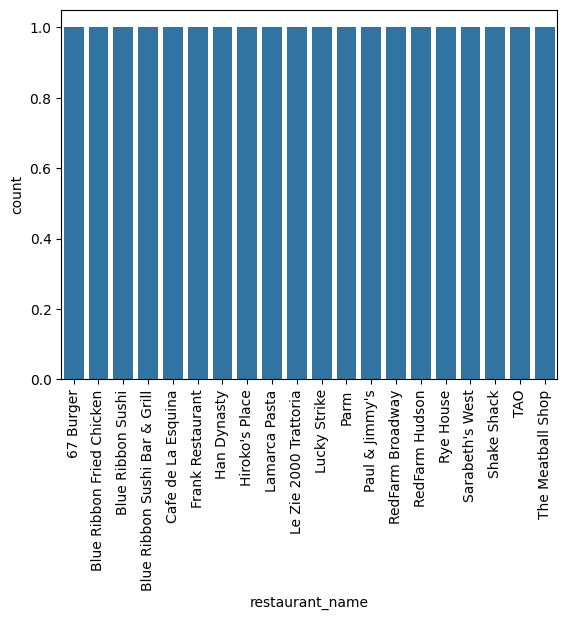

In [401]:
# Write the code here
#plt.figure(figsize = (20, 15))
restaurant = sns.countplot( data = df_m, x= 'restaurant_name') #, hue = 'Order_Count')
#cuisine = sns.countplot( data = data, x= 'cuisine_type')

plt.xticks(rotation = 90)
plt.show()


#print(cuisine)

* The observations are uniformly distributed across the 'restaurant_name' , which doesn't tell anything

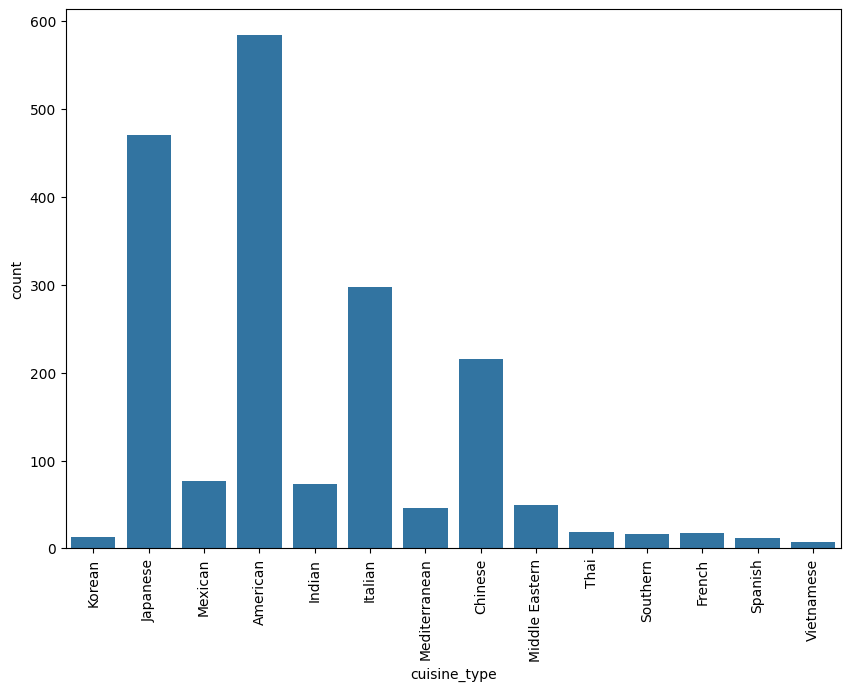

In [402]:
plt.figure(figsize = (10, 7))

cuisine = sns.countplot( data = data, x= 'cuisine_type')

plt.xticks(rotation = 90)
plt.show()

* The number of ordered for 'American' cusin type  is highest than others, 'Japanese' is second and 'Italian' is third

<Axes: xlabel='day_of_the_week', ylabel='count'>

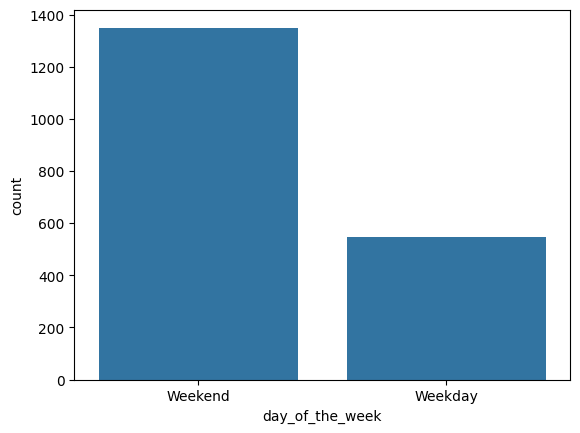

In [403]:
sns.countplot(data = data, x = 'day_of_the_week') # to create bar chart for day_of_the_week orders distribution


* The number of orderers is more on weekend than on weekday

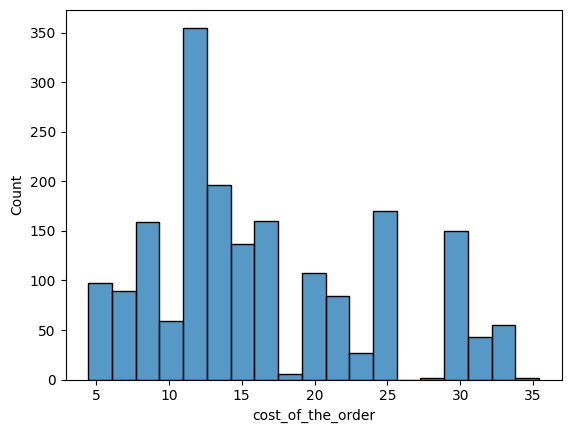

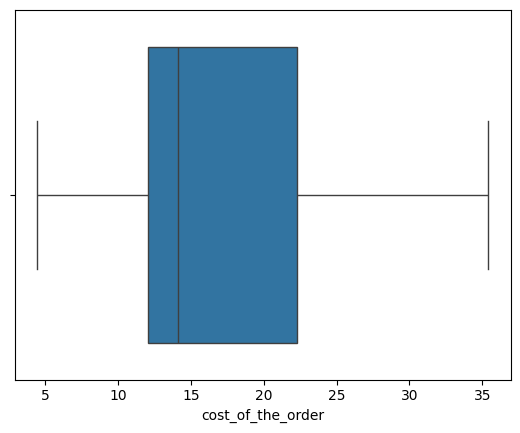

In [404]:
sns.histplot(data = data, x = 'cost_of_the_order')
plt.show()


sns.boxplot(data = data, x= 'cost_of_the_order')
plt.show()



*   The distribution of 'cost_of_the_order' is little right skewed
* There is no of outliers in this variable
* While mostly the price of 'cost_of_the_order' are at a meduim, we have observations where the price of 'cost_of_the_order' are from $5 to  $35

* Both the mean and median are around middle
* 50% of the 'cost_of_the_order' values are less than $14, indicating less prices
* It will be interesting to see how 'cost_of_the_order' affects the orders rercived frequency

* We know that a lot people are likely to order if they saw low price value, so orders are most likely to increase when they have low price


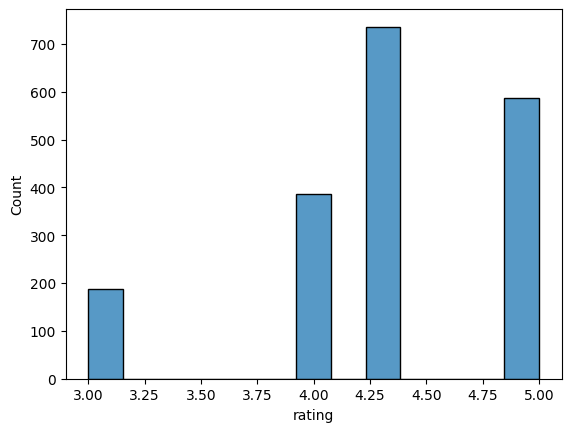

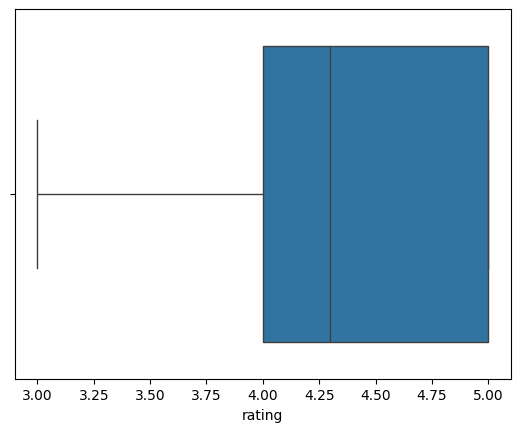

In [405]:

sns.histplot(data = data, x = 'rating')
plt.show() # to only display the graph


sns.boxplot(data = data, x= 'rating')
plt.show()





*   The distribution of rating is highly left skewed
* There is no of outliers in this variable
* While mostly the number of ratings are at a higher end, we have observations where the number of ratings are from 3 to 5

* Both the mean and median are high, indicating that the rating is good on most times
* There are, however, 25% is towards the left, indicating that rating is low to 3 on some times
* It will be interesting to see how rating affects the orders rercived frequency

* We know that a lot people are likely to order if they saw high rating value, so orders are most likely to increase when they have high rating




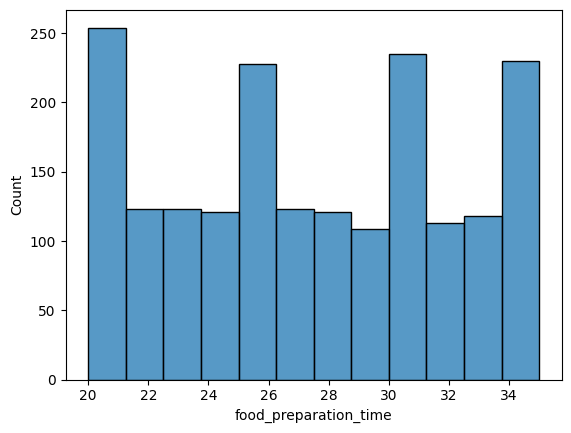

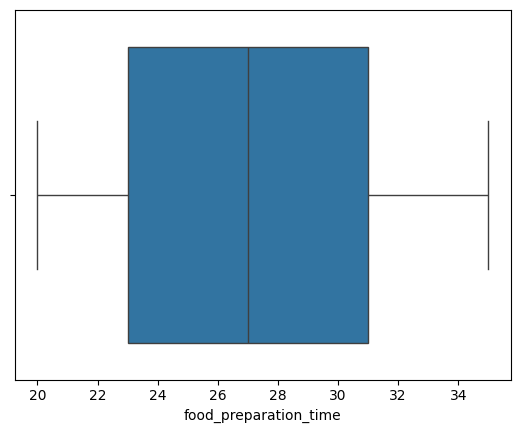

In [406]:

sns.histplot(data = data, x = 'food_preparation_time')
plt.show()


sns.boxplot(data = data, x= 'food_preparation_time')
plt.show()




*   The distribution is close to normal
* There is no of outliers in this variable
* While mostly the minute of 'food_preparation_time' are around 27 min, we have observations where the min of 'food_preparation_time' are from 20 to 34 minutes

* 50% of the 'food_preparation_time' minutes are less than 27 min,
* It will be interesting to see how 'food_preparation_time' affects the orders rercived frequency

* We know that a lot people are likely to order if they saw low 'food_preparation_time' time, so orders are most likely to increase when they have less timing


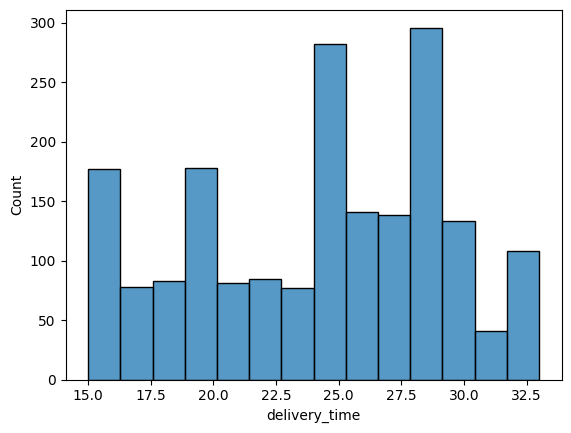

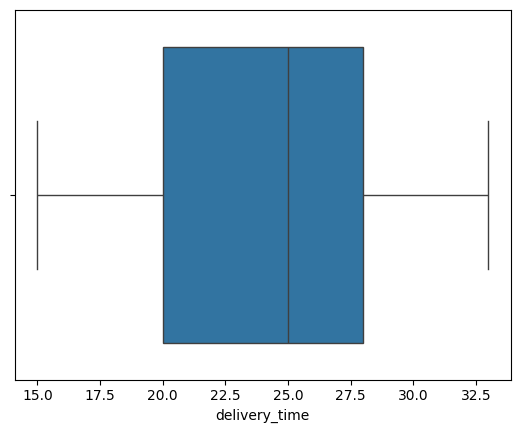

In [407]:

sns.histplot(data = data, x = 'delivery_time')
plt.show()


sns.boxplot(data = data, x= 'delivery_time')
plt.show()


*   The distribution is close to normal
* There is no of outliers in this variable
* While mostly the minute of ''delivery_time'' are around 25 min, we have observations where the min of 'food_preparation_time' are from 15 to 33 minutes

* 50% of the ''delivery_time'' minutes are less than 25 min, and 25% might take more than 28 minutes
* It will be interesting to see how ''delivery_time'' affects the orders rercived frequency

* We know that a lot people are likely to order if they saw low ''delivery_time'' time, so orders are most likely to increase when they have less timing

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [408]:
datah = data['restaurant_name'].value_counts()
#print(datah)
top_5 = datah.nlargest(5)
print(top_5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [409]:
data.groupby('restaurant_name').rating.sum().sort_values(ascending = False)

,rating
restaurant_name,
Shake Shack,938.8
The Meatball Shop,585.4
Blue Ribbon Sushi,505.8
Blue Ribbon Fried Chicken,414.6
Parm,285.7
...,...
Sarabeth's West,3.0
Woorijip,3.0
Nha Trang One,3.0


#### Observations:
* Top 5 restaurants are:

Shake Shack          
The Meatball Shop            
Blue Ribbon Sushi            
Blue Ribbon Fried Chicken     
Parm   

* Top restaurants have high number of sum of ratings too

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

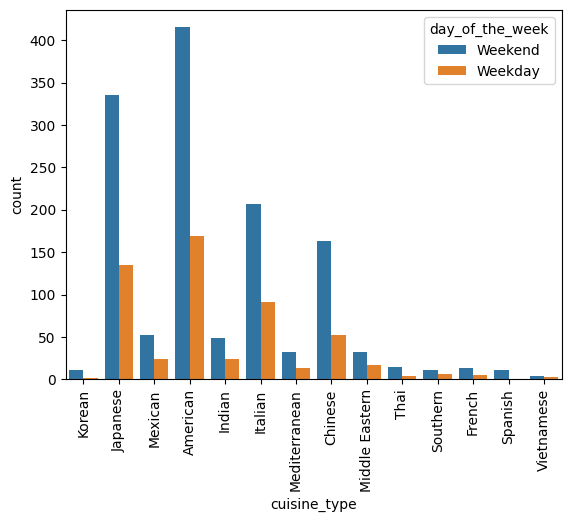

In [410]:

sns.countplot(data = data, x = 'cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation = 90)
plt.show()


#### Observations:
* The number of ordered on weekends for 'American' cusin type  is highest than others, 'Japanese' is second and 'Italian' is third. Same to weekdays too.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [411]:
orders_above_20 = data.loc[data['cost_of_the_order'] > 20]
print(orders_above_20)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
3      1477334       106968              Blue Ribbon Fried Chicken   
5      1477224       147468                       Tamarind TriBeCa   
12     1476966       129969              Blue Ribbon Fried Chicken   
17     1477373       139885              Blue Ribbon Sushi Izakaya   
...        ...          ...                                    ...   
1884   1477437       304993                            Shake Shack   
1885   1477550        97324                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1895   1477819        35309                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week  rating  \
0          Korean              30.75         Weekend     4.3   
3        American              

In [412]:
len(orders_above_20)

555

In [413]:
percentage = (len(orders_above_20) / len(data)) * 100

percentage = round(percentage, 2)

print(percentage)


29.24


<Axes: xlabel='cost_of_the_order'>

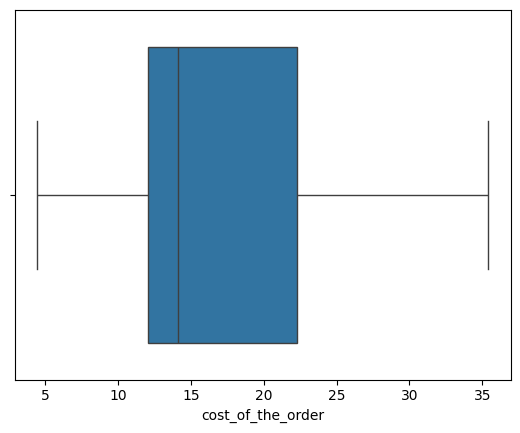

In [414]:
# Write the code here
sns.boxplot(data = data, x = 'cost_of_the_order')

#### Observations:
* 29% of the orders are cost more than $ 20, which means all the third quertile.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [415]:
# Write the code here
delivery_mean = data['delivery_time'].mean()

delivery_meann = round(delivery_mean, 2)
print(delivery_mean)

24.161749209694417


In [416]:
delivery_meann = round(delivery_mean, 2)
print(delivery_meann)

24.16


<Axes: xlabel='delivery_time'>

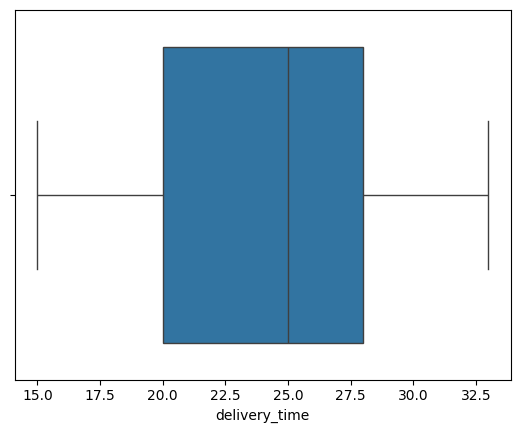

In [417]:
sns.boxplot(data = data, x = 'delivery_time')

#### Observations:
The average time to deliver the food is taking around 24 or 25 minutes, the min is 15 min and the max is 33 min to deliver the food

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [418]:
datahh = data['customer_id'].value_counts()
top_3 = datahh.nlargest(3)
print(top_3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The highest number of order per customer is 13

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

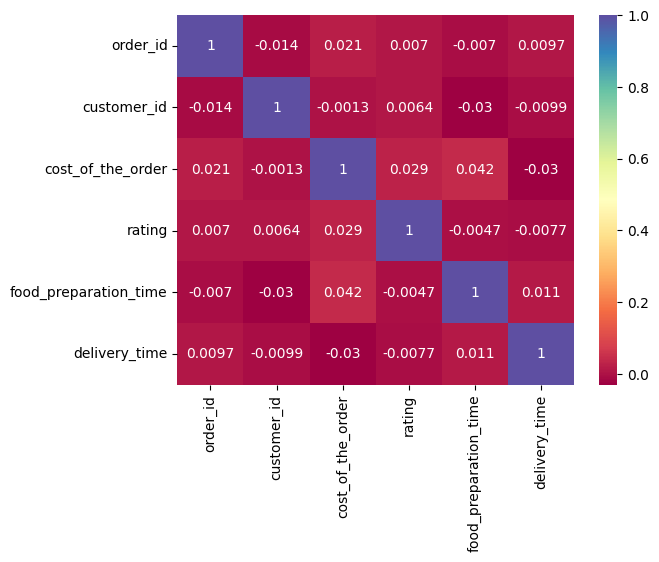

In [419]:
# Write the code here
datah = data.corr(numeric_only = True)
sns.heatmap(data = datah, annot = True, cmap = 'Spectral')

* There does not seem to be a strong relationship between the variables
* food_preparation_time and delivery_time are negatively correlated with rating
* As expected, food_preparation_time shows positive correlation with delivery_time
* cost_of_the_order is positively correlated with food_preparation_time. If it is taking long time to for preparing, then the cost will be increased. This is aligned with our intuitive understanding



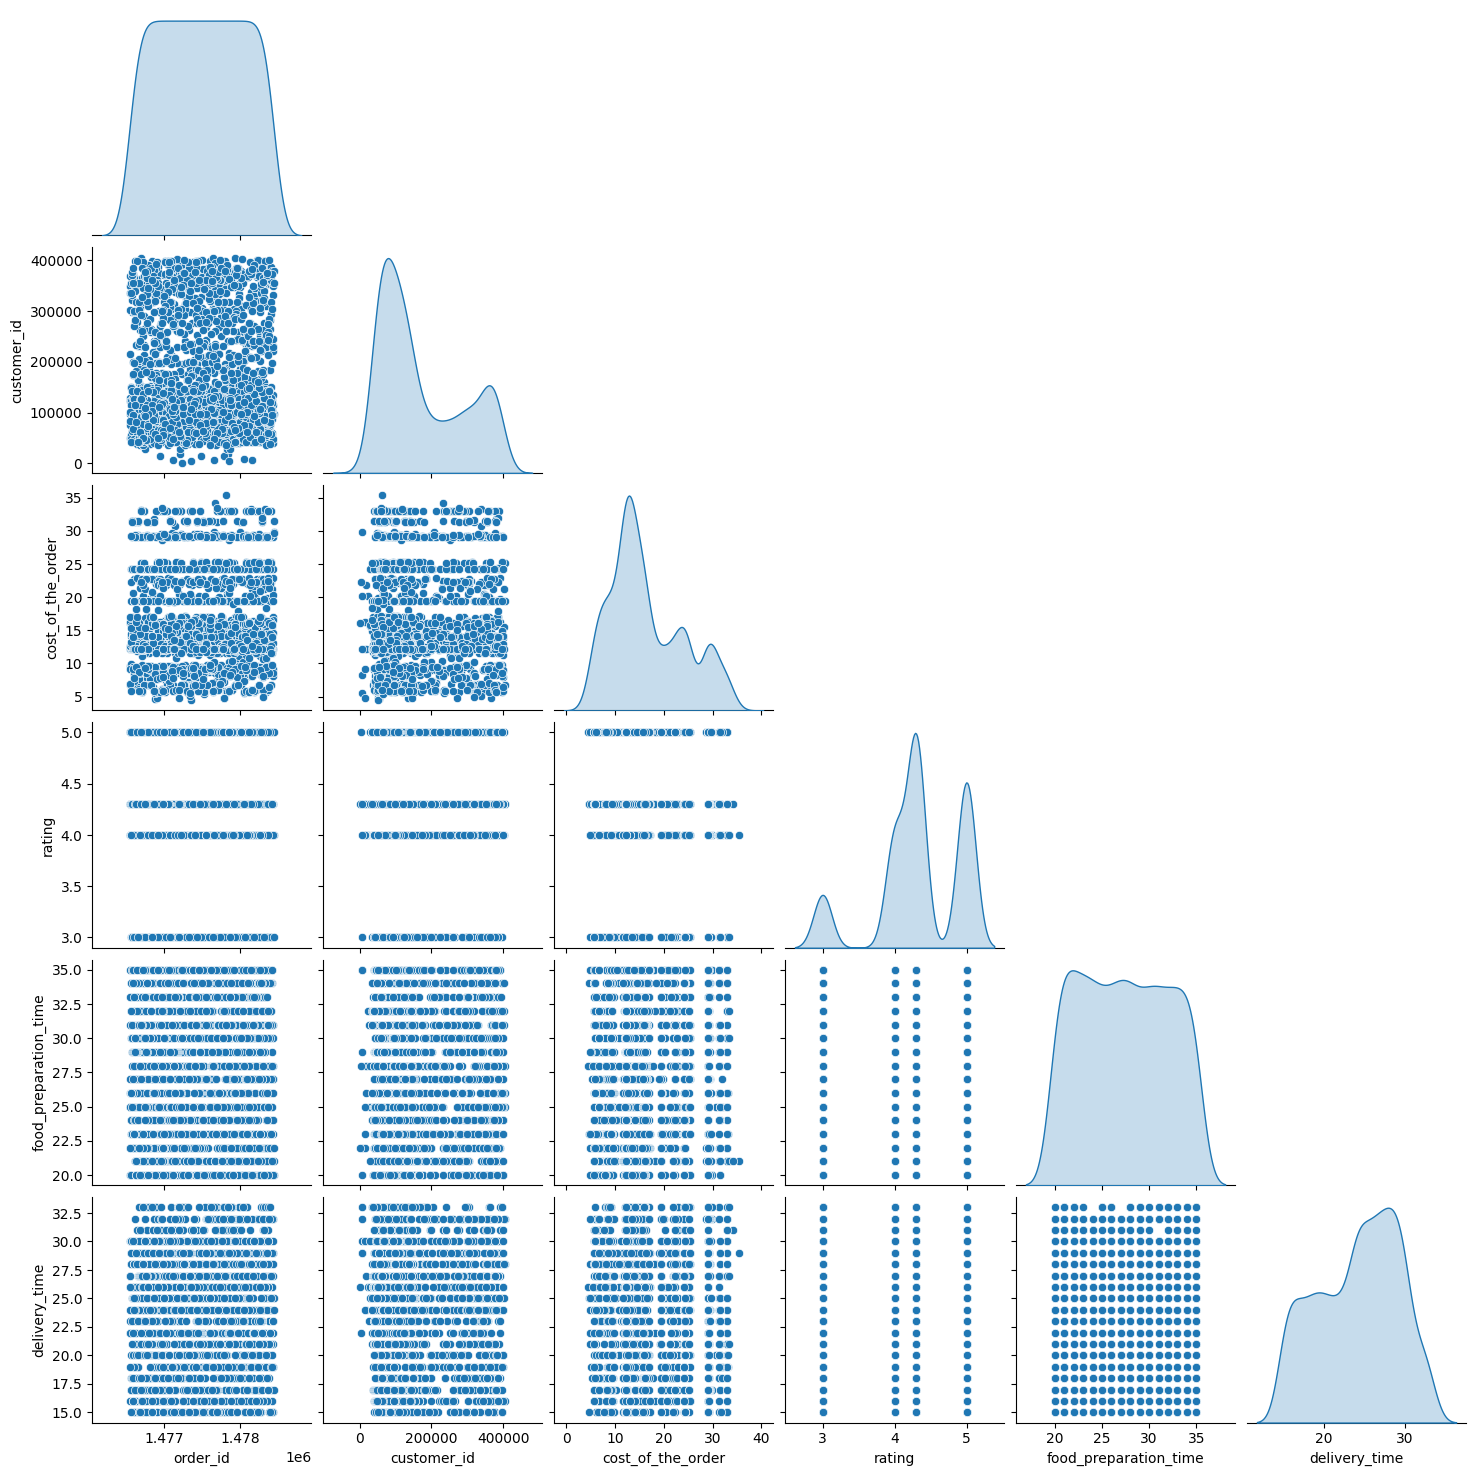

In [420]:
sns.pairplot(data = data, corner = True, diag_kind="kde")

* We get the same insights as from the correlation plot
* There does not seem to be a strong relationship between the variables



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [421]:
#rating_MoreThan50.rename(columns = {'rating': 'rating_count'}, inplace = True)
rating_allcunt = data.groupby(['restaurant_name']) ['rating'].count()

print(rating_allcunt)

restaurant_name
'wichcraft           1
12 Chairs            4
5 Napkin Burger      5
67 Burger            1
Alidoro              1
                    ..
Zero Otto Nove       2
brgr                 2
da Umberto           3
ilili Restaurant    18
indikitch            4
Name: rating, Length: 178, dtype: int64


In [422]:
#rating_MoreThan50 = data.groupby(['restaurant_name']) ['rating'].count()
rating_MoreThan50 =rating_allcunt.loc[rating_allcunt > 50]
print(rating_MoreThan50)


restaurant_name
Blue Ribbon Fried Chicken     96
Blue Ribbon Sushi            119
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Shake Shack                  219
The Meatball Shop            132
Name: rating, dtype: int64


* out of 178 resturants ratings count only 7 resturants ratings are more than 50

In [423]:
rating_allsAvg = data.groupby(['restaurant_name']) ['rating'].mean()
print(rating_allsAvg)

restaurant_name
'wichcraft          5.000000
12 Chairs           4.400000
5 Napkin Burger     4.180000
67 Burger           5.000000
Alidoro             4.300000
                      ...   
Zero Otto Nove      4.150000
brgr                3.650000
da Umberto          4.533333
ilili Restaurant    4.194444
indikitch           4.400000
Name: rating, Length: 178, dtype: float64


In [424]:
rating_MoreThan4 = rating_allsAvg.loc[rating_allsAvg > 4]
print(rating_MoreThan4)

restaurant_name
'wichcraft                  5.000000
12 Chairs                   4.400000
5 Napkin Burger             4.180000
67 Burger                   5.000000
Alidoro                     4.300000
                              ...   
Yama Japanese Restaurant    4.388889
Zero Otto Nove              4.150000
da Umberto                  4.533333
ilili Restaurant            4.194444
indikitch                   4.400000
Name: rating, Length: 151, dtype: float64


* out of 178 resturants avg ratings only 151 resturants avg ratings are more than 4

In [425]:
df1 = rating_MoreThan50.to_frame() # changing into dataframe
df2 = rating_MoreThan4.to_frame()


In [426]:
df2.rename(columns = { 'rating_allsAvg': 'rating_avg'}, inplace = True)
print(df2)

                            rating
restaurant_name                   
'wichcraft                5.000000
12 Chairs                 4.400000
5 Napkin Burger           4.180000
67 Burger                 5.000000
Alidoro                   4.300000
...                            ...
Yama Japanese Restaurant  4.388889
Zero Otto Nove            4.150000
da Umberto                4.533333
ilili Restaurant          4.194444
indikitch                 4.400000

[151 rows x 1 columns]


In [427]:
df2.rename(columns = { 'rating': 'rating_avg'}, inplace = True)
print(df2)

                          rating_avg
restaurant_name                     
'wichcraft                  5.000000
12 Chairs                   4.400000
5 Napkin Burger             4.180000
67 Burger                   5.000000
Alidoro                     4.300000
...                              ...
Yama Japanese Restaurant    4.388889
Zero Otto Nove              4.150000
da Umberto                  4.533333
ilili Restaurant            4.194444
indikitch                   4.400000

[151 rows x 1 columns]


In [428]:
df1.rename(columns = { 'rating': 'rating_count'}, inplace = True)
print(df1)

                           rating_count
restaurant_name                        
Blue Ribbon Fried Chicken            96
Blue Ribbon Sushi                   119
Parm                                 68
RedFarm Broadway                     59
RedFarm Hudson                       55
Shake Shack                         219
The Meatball Shop                   132


In [429]:
merged = df1.merge(df2, on = 'restaurant_name', how = 'inner').sort_values(ascending = False, by = 'rating_count')
print(merged)

                           rating_count  rating_avg
restaurant_name                                    
Shake Shack                         219    4.286758
The Meatball Shop                   132    4.434848
Blue Ribbon Sushi                   119    4.250420
Blue Ribbon Fried Chicken            96    4.318750
Parm                                 68    4.201471
RedFarm Broadway                     59    4.261017
RedFarm Hudson                       55    4.223636


#### Observations:
* The one we saw before , the top resturants are also again who have more than 50 rating count and more than 4 avg ratings:

Shake Shack                         
The Meatball Shop                  
Blue Ribbon Sushi                 
Blue Ribbon Fried Chicken           
Parm                                
RedFarm Broadway                    
RedFarm Hudson    

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [430]:
data['cost_of_the_order'].min()

4.47

In [431]:
data['cost_of_the_order'].max()

35.41

In [432]:
net_revenue = 0

# Calculate revenue
for cost in data['cost_of_the_order']:
    if cost > 20:
        net_revenue += cost * 0.25  # 25% charge
    elif cost > 5:
        net_revenue += cost * 0.15  # 15% charge
    else:
        net_revenue += cost * 0  # No charge


In [433]:
print(f"Net Revenue Generated by the Company: ${net_revenue:.2f}")

Net Revenue Generated by the Company: $6166.30


<Axes: xlabel='cost_of_the_order'>

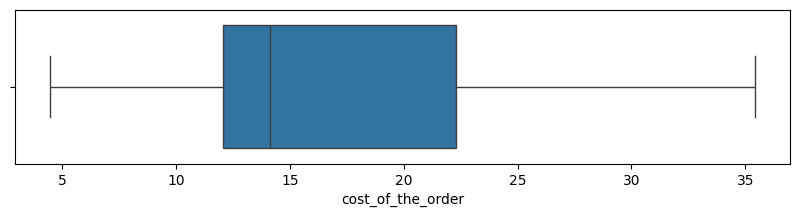

In [434]:
plt.figure(figsize = (10,2))
sns.boxplot(data = data, x = 'cost_of_the_order')


#### Observations:
* Net Revenue Generated by the Company: $6166.30

As reminder from the graph around 50% of the 'cost_of_the_order' is more than \$15 so more revenue for the company.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [435]:
# Write the code here
#data.groupby(['restaurant_name']) ['rating'].sum()
data.loc[data['delivery_time'] > 20]
data['delivery_time'].max()

data['tot_time'] = data['delivery_time'] + data['food_preparation_time']
#print(data)
data['tot_time'].max()
#print(data)
data['per_tot'] = ((data['tot_time']  )/ data['tot_time'].sum()) * 100
#print(data)
deli = data.loc[data['tot_time'] > 60]
print(deli)
#(data.loc[data['tot_time'] > 60]).count()


      order_id  customer_id             restaurant_name    cuisine_type  \
7      1477859        89574                   Barbounia   Mediterranean   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼         Chinese   
19     1477354        67487           Blue Ribbon Sushi        Japanese   
24     1476714       363783                Cafe Mogador  Middle Eastern   
54     1477760       130507           Jack's Wife Freda   Mediterranean   
...        ...          ...                         ...             ...   
1869   1476923        50199                 J. G. Melon        American   
1873   1478148       261371                 Shake Shack        American   
1875   1478039       292343                  Amy Ruth's        Southern   
1880   1477466       222734                 Shake Shack        American   
1889   1478190        94152            RedFarm Broadway         Chinese   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
7                  5.97  

In [436]:
#data.groupby(['tot_time'] > 60) ['per_tot'].sum()

deli['per_tot'].sum()

12.894255247364814

In [437]:
round(deli['per_tot'].sum(), 2)

12.89

#### Observations:
13% of the ordered foods took more than 60 minutes for preparing and delivering.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [438]:
# Write the code here
dm = data.groupby(['day_of_the_week']) ['delivery_time'].mean()
print(dm)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
The delivery time in weekday is greater than weekends by almost 6 minutes, it might be on weekdays there might be more traffic than weekends by job reason

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
I analyzed a dataset of 1,898 orders in New York, focusing on the number of orders to assess demand across restaurants. The goal was to identify trends and factors affecting orders to enhance customer experience.

I have been able to conclude that -

* Popular Restaurants: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
* Top Cuisine Types: American, Japanese, and Italian.
* Weekend Trends: Orders steadily increase on weekends, with a higher rate compared to weekdays, suggesting people order more to enjoy their weekends.
* Weekday Trends: Demand declines slightly on weekdays, highlighting a need to investigate the reasons behind lower orders.



### Recommendations:

* Focus on improving ratings, as higher ratings are linked to increased orders.
* Ensure sufficient staff availability during weekends to handle peak order volumes.
* Prioritize the availability of raw materials for popular cuisines: American, Japanese, and Italian.

Further Analysis:
* Examine the bottom 10 restaurants with the least orders and explore factors contributing to low weekday demand.
* Investigate order demand variations during holidays versus non-holidays.
* Collect data on order timing throughout the day and develop a model to predict optimal ordering periods.

In [440]:
!jupyter nbconvert --to html Hana_Mekonnen_FoodHub_Learner_Notebook_Full_Code1.ipynb

[NbConvertApp] Converting notebook Hana_Mekonnen_FoodHub_Learner_Notebook_Full_Code1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1424272 bytes to Hana_Mekonnen_FoodHub_Learner_Notebook_Full_Code1.html
